In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import pickle

from IPython.display import Image
import time
import numpy as np

rng = np.random.default_rng()

In [ ]:
from google.colab import drive

# This will authorize Colab to access Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Centrality measures for undirected networks**
In this exercise, we will get familiar with some common centrality measures by applying them to undirected networks (although these measures can all be generalized to directed networks).
Below, we list and define the measures used in this exercise:
- **degree $k(i)$**:
Number of neighbors of node $i$.

- **betweenness centrality $bc(i)$**:
Number of shortest paths between other nodes of the network that pass through node $i$. If there are several shortest paths between a given pair of nodes, then the contribution of that node pair to the betweenness of $i$ is given by the fraction of those paths that contain $i$. Betweenness scores are normalized by $(N-1)(N-2)$, i.e. the number of node-pairs in the network, excluding pairs that contain $i$ (because paths starting or ending in node $i$ do not contribute to the betweenness of $i$), which is the maximum possible score.
If $\sigma_{st}$ is the number of shortest paths from $s$ to $t$ and $\sigma_{sit}$ the number of such paths that contain $i$, then
$$
bc(i) = \frac{1}{(N-1)(N-2)}\sum_{s\neq i} \sum_{t\neq i} \dfrac{\sigma_{sit}}{\sigma_{st}}.
$$

- **closeness centrality $C(i)$**:
Inverse of the average shortest path distance to all other nodes except $i$:
$$
C(i) = \dfrac{N-1}{\sum\limits_{v\neq i}d(i,v)}.
$$

- **eigenvector centrality $e(i)$**:
Eigenvector centrality is a generalization of degree that takes into account the degrees of the node's neighbors, and recursively the degrees of the neighbors of neighbors, and so on. It is defined as the eigenvector of the adjacency matrix that corresponds to the largest eigenvalue.

First, we are going to load the data.

In [ ]:
file_path_cayley = "/content/drive/MyDrive/Complex Networks /cayley_tree_edge_list.edg"
file_path_karate = "/content/drive/MyDrive/Complex Networks /karate_club_edge_list.edg"
file_path_dolphins = "/content/drive/MyDrive/Complex Networks /dolphins_edge_list.edg"

file_path_cayley_coords = "/content/drive/MyDrive/Complex Networks /cayley_tree_coords.pkl"
file_path_karate_coords = "/content/drive/MyDrive/Complex Networks /karate_club_coords.pkl"
file_path_dolphins_coords = "/content/drive/MyDrive/Complex Networks /dolphins_coords.pkl"

In [ ]:
cayley_net = nx.read_weighted_edgelist(file_path_cayley, nodetype=int)

In [ ]:
karate_net = nx.read_weighted_edgelist(file_path_karate, nodetype=int)

In [ ]:
dolphins_net = nx.read_weighted_edgelist(file_path_dolphins, nodetype=int)

In [ ]:
with open(file_path_cayley_coords, 'rb') as file:
    # Load the data from the Pickle file
    cayley_coords = pickle.load(file,encoding='latin1')

with open(file_path_karate_coords, 'rb') as file:
    # Load the data from the Pickle file
    karate_coords = pickle.load(file, encoding='latin1')

with open(file_path_dolphins_coords, 'rb') as file:
    # Load the data from the Pickle file
    dolphins_coords = pickle.load(file, encoding='latin1')

## **b) Calculating centralities using NetworkX**
Use NetworkX to compute the degree, betweenness, closeness, and eigenvector centralities for the networks for the three networks we imported above:

- Cayley tree (`cayley_edge_list.edg`)
- Zachary karate club network (`karate_club_edge_list.edg`)
- dolphin social network (`dolphins_edge_list.edg`)

Then visualize the relationships between the four centralities as scatter plots in a pairwise manner. For that, you can use `plot_pairwise_scatter_networks()` function provided below.

Hint: For some of the networks, the power iteration algorithm used by NetworkX to calculate eigenvector centrality may not converge. In this case, increase the value of the tolerance
(`tol`) parameter of `eigenvector_centrality()` until the iteration converges.

In this exercise, we use `seaborn` package for visualization. Read more about the scatter plots of paiwise relationships [here](https://seaborn.pydata.org/tutorial/relational.html) and [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

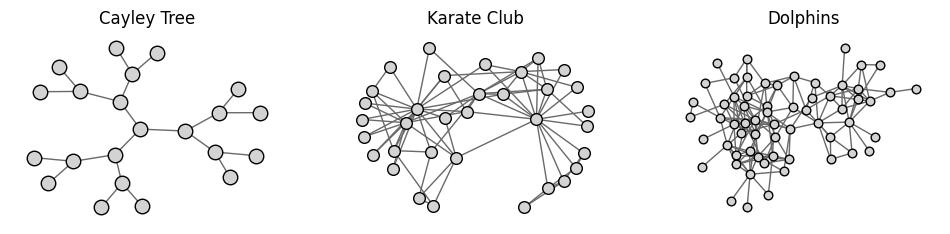

In [ ]:
networks = [cayley_net, karate_net, dolphins_net]
coords_list = [cayley_coords, karate_coords, dolphins_coords]
network_names = ['Cayley Tree', 'Karate Club', 'Dolphins']

figsize = (12, 2.5)
fig, axes = plt.subplots(1, 3, figsize=figsize)
for i, (network, coords, name) in enumerate(zip(networks, coords_list, network_names)):
    ax = axes[i]
    node_size = 80 * figsize[0] * figsize[1] / network.number_of_nodes()
    nx.draw(network, ax=ax, pos=coords,
            node_size=node_size, node_color='lightgray', edge_color='dimgray', edgecolors='k')
    ax.set_title(name)

In [ ]:
def get_centrality_measures(network, tol):
    """
    Calculates four centrality measures (degree, betweenness, closeness, and
    eigenvector centrality) for the nodes of the given network.
    The list of each centrality is sorted in the same nodewise order.

    Parameters
    ----------
    network: nx.Graph
        The network for which the centrality measures are calculated.
    tol: float
        Tolerance parameter for calculating the eigenvector centrality.

    Returns
    -------
    degrees: list
        The degree centrality of the nodes in the network.
    betweenness: list
        The betweenness centrality of the nodes in the network.
    closeness: list
        The closeness centrality of the nodes in the network.
    eigenvector: list
        The eigenvector centrality of the nodes in the network.
    """

    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(network)
    degrees = [degree_centrality[node] for node in network.nodes()]

    # Calculate betweenness centrality
    betweenness = list(nx.betweenness_centrality(network).values())

    # Calculate closeness centrality
    closeness = list(nx.closeness_centrality(network).values())

    # Calculate eigenvector centrality
    eigenvector = list(nx.eigenvector_centrality(network, tol=tol).values())

    # Sort the centrality values based on the original node order
    nodes_order = list(network.nodes())

    degrees = [x for _, x in sorted(zip(nodes_order, degrees))]
    betweenness = [x for _, x in sorted(zip(nodes_order, betweenness))]
    closeness = [x for _, x in sorted(zip(nodes_order, closeness))]
    eigenvector = [x for _, x in sorted(zip(nodes_order, eigenvector))]

    return degrees, betweenness, closeness, eigenvector


In [ ]:
def plot_pairwise_scatter_networks(networks, names, tol=1e-6):
    """
    Plot pairwise relationships between centralities for a list of networks.

    Parameters
    ----------
    networks : list
        List of networks to be analyzed.
    names : list
        List of names for each network.
    tol : float
        Tolerance parameter for calculating the eigenvector centrality.
    """
    # Create dataframe
    df = pd.DataFrame()
    for network, name in zip(networks, names):
        # Compute centralities
        degrees, betweenness, closeness, eigenvector = get_centrality_measures(network, tol=tol)
        # Create dataframe
        df = pd.concat([df, pd.DataFrame({'degree': degrees,
                                          'betweenness': betweenness,
                                          'closeness': closeness,
                                          'eigenvector': eigenvector,
                                          'network': name})])

    # Plot pairwise relationships
    grid = sns.PairGrid(df, hue='network')
    grid.map_diag(sns.histplot)
    grid.map_offdiag(sns.scatterplot, alpha=0.6, style=df['network'])
    grid.add_legend()
    return grid

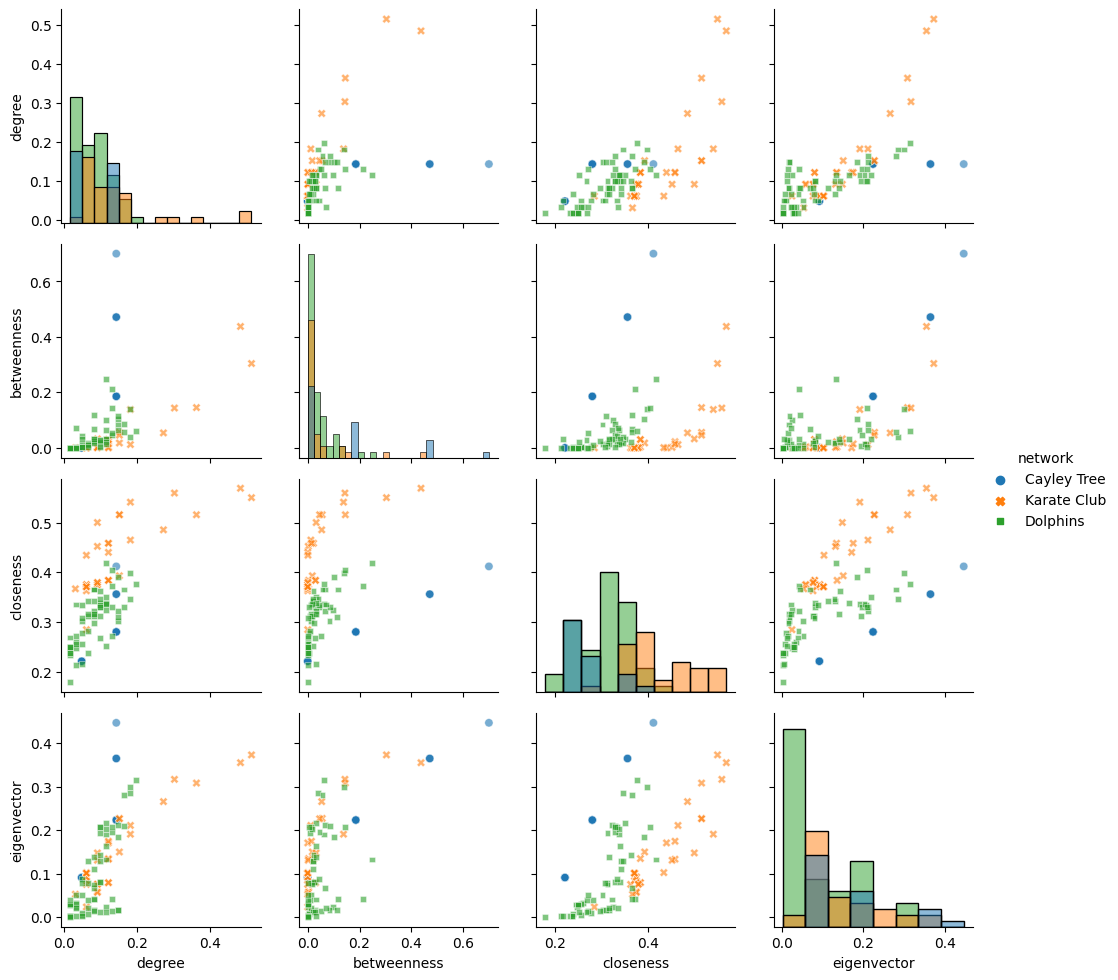

In [ ]:
network_list = [cayley_net, karate_net, dolphins_net]
network_names = ['Cayley Tree', 'Karate Club', 'Dolphins']
grid = plot_pairwise_scatter_networks(network_list, network_names)

## **c) Visualizing centralities on networks**
To highlight the differences between the centrality measures, visualize each network studied in part b) (the Cayley tree, karate club network, and dolphin social network), using each of the centrality measures to define the colors of the network nodes. To make the visualization easier, coordinates of the nodes are provided in `.pkl` files (`cayley_coords.pkl`, `karate_club_coords.pkl`, `dolphines_coords.pkl`).

In [ ]:
def visualize_on_network(network, name, node_values, coords,
                         titles, figsize=(8, 5), palette='YlOrRd'):
    """
    Creates visualizations of the network with nodes color coded by each of the
    node values sets.

    Parameters
    ----------
    network: networkx.Graph()
    name: string
        Name of the network
    node_values: list of lists
        Each list contains the centrality values for the nodes
    coords: node coordinates
    titles: list of strings
        Titles for each centrality
    palette: string
        Name of the color palette
    fig_size: tuple
        Size of the figure

    Returns
    -------
    fig: figure object
    """
    assert len(node_values[0]), "there should be multiple values per node"
    network_gs_indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

    fig, axes = plt.subplots(2, 2, layout='constrained', figsize=figsize)
    cmap = plt.get_cmap(palette)
    fig.suptitle(name, fontweight="bold")
    # Adaptive node size based on the figure size and number of nodes
    node_size = 80 * figsize[0] * figsize[1] / len(network.nodes())
    # Loop over different value sets
    for node_val, title, network_gs_idx \
        in zip(node_values, titles, network_gs_indices):
        # Draw the network figure
        ax = axes[network_gs_idx]
        nx.draw(network, pos=coords, ax=ax, node_color=node_val, cmap=cmap,
                node_size=node_size, edgecolors='black')

        # Draw the colorbar
        norm = mpl.colors.Normalize(vmin=np.min(node_val), vmax=np.max(node_val))
        scm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
        plt.colorbar(scm, ax=ax)

        ax.set_title(title)

    return fig

In [ ]:
network_names = ['Cayley Tree', 'Karate Club', 'Dolphins']
networks = [cayley_net, karate_net, dolphins_net]
coords_list = [cayley_coords, karate_coords, dolphins_coords]
titles = ['Degree', 'Betweenness centrality', 'Closeness centrality', 'Eigenvector centrality']

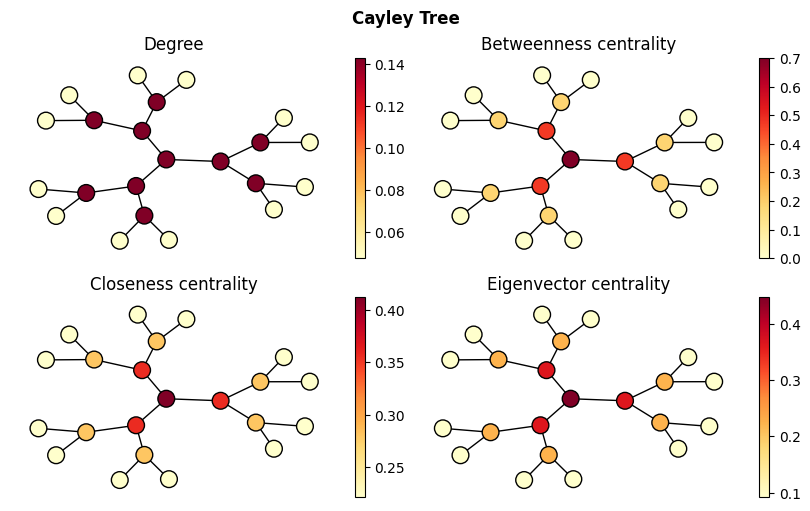

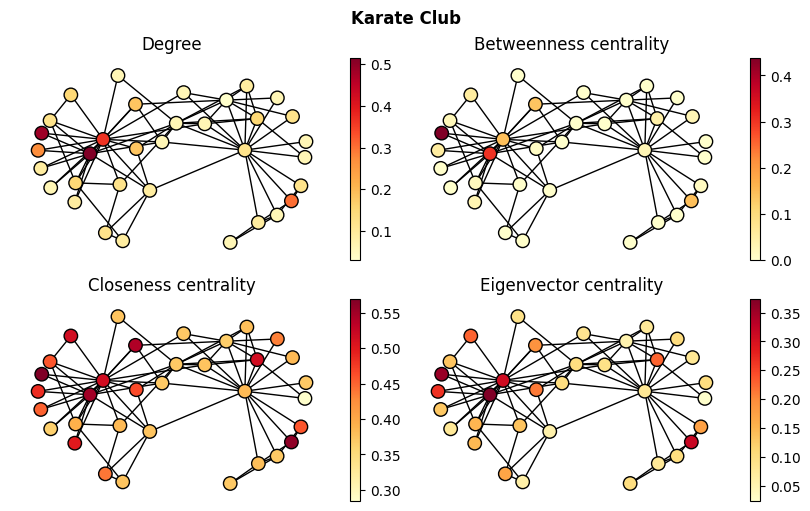

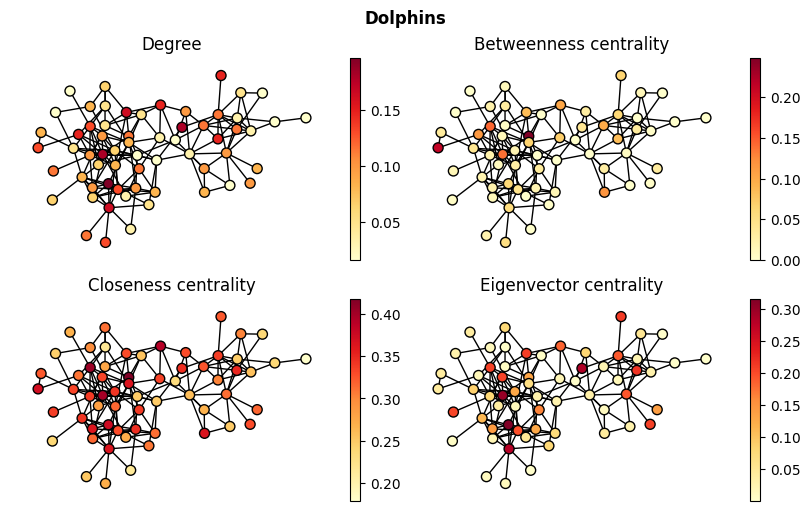

In [ ]:
for network, name, coords in zip(networks, network_names, coords_list):
    degrees, betweenness, closeness, eigenvector = get_centrality_measures(network, tol=1e-6)
    node_values = [degrees, betweenness, closeness, eigenvector]
    fig = visualize_on_network(network, name, node_values, coords, titles)

In [ ]:
degrees_cayley, betweenness_cayley, closeness_cayley, eigenvector_cayley = get_centrality_measures(cayley_net, tol=1e-6)
degrees_karate, betweenness_karate, closeness_karate, eigenvector_karate = get_centrality_measures(karate_net, tol=1e-6)
degrees_dolphins, betweenness_dolphins, closeness_dolphins, eigenvector_dolphins = get_centrality_measures(dolphins_net, tol=1e-6)

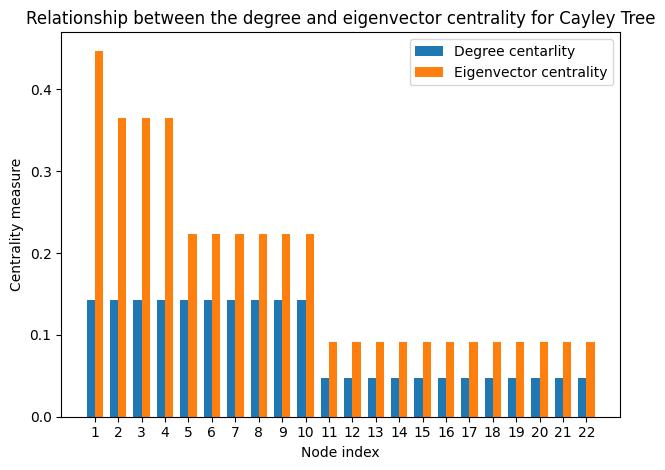

In [ ]:
# Calculate the positions of bars for each node
index = np.arange(1, len(degrees_cayley) + 1)  # Start from 1 and go up to the number of nodes

# Bar width
bar_width = 0.35

# Create the histogram plot
plt.bar(index, degrees_cayley, bar_width, label='Degree centarlity', align='center')
plt.bar(index + bar_width, eigenvector_cayley, bar_width, label='Eigenvector centrality', align='center')

# Axis labels
plt.xlabel('Node index')
plt.ylabel('Centrality measure')
plt.title('Relationship between the degree and eigenvector centrality for Cayley Tree')
plt.legend()  # Show the legend

# Set the x-axis ticks with 1 spacing
plt.xticks(index + bar_width / 2, index)

# Show the plot
plt.tight_layout()
plt.show()

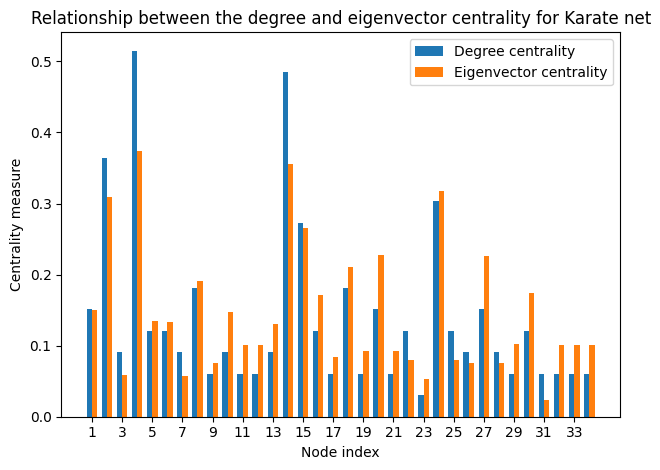

In [ ]:
# Calculate the positions of bars for each node
index = np.arange(1, len(degrees_karate) + 1)  # Start from 1 and go up to the number of nodes

# Bar width
bar_width = 0.35

# Create the histogram plot
plt.bar(index, degrees_karate, bar_width, label='Degree centrality', align='center')
plt.bar(index + bar_width, eigenvector_karate, bar_width, label='Eigenvector centrality', align='center')

# Axis labels
plt.xlabel('Node index')
plt.ylabel('Centrality measure')
plt.title('Relationship between the degree and eigenvector centrality for Karate net')
plt.legend()  # Show the legend

# Set the x-axis ticks with spacing of 2
plt.xticks(index[::2] + bar_width / 2, index[::2])

# Show the plot
plt.tight_layout()
plt.show()


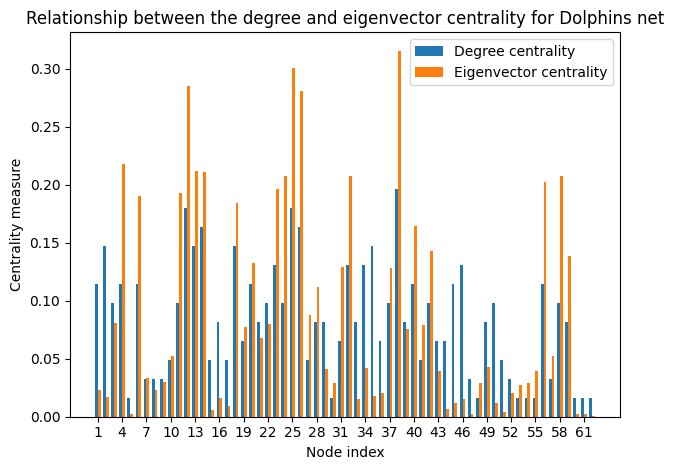

In [ ]:
# Calculate the positions of bars for each node
index = np.arange(1, len(degrees_dolphins) + 1)  # Start from 1 and go up to the number of nodes

# Bar width
bar_width = 0.35

# Create the histogram plot
plt.bar(index, degrees_dolphins, bar_width, label='Degree centrality', align='center')
plt.bar(index + bar_width, eigenvector_dolphins, bar_width, label='Eigenvector centrality', align='center')

# Axis labels
plt.xlabel('Node index')
plt.ylabel('Centrality measure')
plt.title('Relationship between the degree and eigenvector centrality for Dolphins net')
plt.legend()  # Show the legend

# Set the x-axis ticks with spacing of 2
plt.xticks(index[::3] + bar_width / 2, index[::3])

# Show the plot
plt.tight_layout()
plt.show()

## **2. PageRank for directed networks**
PageRank, a generalization of eigenvector centrality for directed networks, was first developed for search engines like Google to determine the centrality of web pages. If we consider a random walker that with probability $d$ moves to one of the successors of the current node (i.e., the nodes **to** which the current node is linked) and with probability $1 - d$ teleports to a random node, the PageRank of each node is equal to the fraction of time that the random walker has spent at that node.

In this exercise, we investigate the behavior of PageRank in a simple directed model network. To get started, you can use this notebook for reference. Fill in the required functions. Some of the functions do NOT need modifications.

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [ ]:
file_path_page_rank = "/content/drive/MyDrive/Complex Networks /pagerank_network.edg"

## **a) Network visualization**
Load the network given in file `pagerank_network.edg` and, as a sanity check, visualize it with `nx.draw`. You would need to modify the function `visualize_network` for this purpose.

**Hints**:
- Use parameter `create_using=nx.DiGraph()` when reading the edge list.
- For a better visuazlization of the network, use `nx.draw` with parameters. For the details about parameters, see documentation [here](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html). Note that `nx.draw` is an alias for `nx.draw_networkx` (with small differences in default parameter settings).
- NetworkX visualization of directed graphs is somewhat ugly but sufficient for the present purposes. In fact, the spring layout algorithm in NetworkX, which is its default algorithm for computing node positions, works only well with undirected graphs. Here, we apply the Kamada-Kawai layout algorithm (`nx.kamada_kawai_layout`) to the undirected version of the network for computing node positions.
- For better visualization of the directed edges, use `connectionstyle='arc3, rad=0.1'` as an argument to `nx.draw` to have curved edges.

In [ ]:
def visualize_network(network, node_positions, cmap='OrRd',
                      node_size=1200, node_colors=[], with_labels=True, edgecolors='k', title=""):
    """
    Visualizes the given network using networkx.draw and saves it to the given
    path.

    Parameters
    ----------
    network : a networkx graph object
    node_positions : a dict of positions of nodes, obtained by e.g. networkx.spring_layout
    cmap : colormap
    node_size : int
    node_colors : a list of node colors
    with_labels : should node labels be drawn or not, boolean
    title: title of the figure, string
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    if node_colors:
        # Visualize the network with nodes colored by PageRank centrality.
        node_centrality = nx.pagerank(network)
        nodes = nx.draw(network, pos=node_positions, node_size=node_size, with_labels=with_labels,
                        node_color=[node_centrality[node] for node in network.nodes()], edgecolors=edgecolors,
                        cmap=cmap, connectionstyle='arc3, rad=0.1')

        # Add colorbar.
        norm = mpl.colors.Normalize(vmin=min(node_centrality.values()), vmax=max(node_centrality.values()))
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array(node_colors)
        fig.colorbar(sm, ax=ax)
    else:
        # Visualize the network without node coloring.
        nodes = nx.draw(network, pos=node_positions, node_size=node_size, with_labels=with_labels,
                        edgecolors=edgecolors, connectionstyle='arc3, rad=0.1')

    ax.set_title(title)
    plt.tight_layout()

    return fig


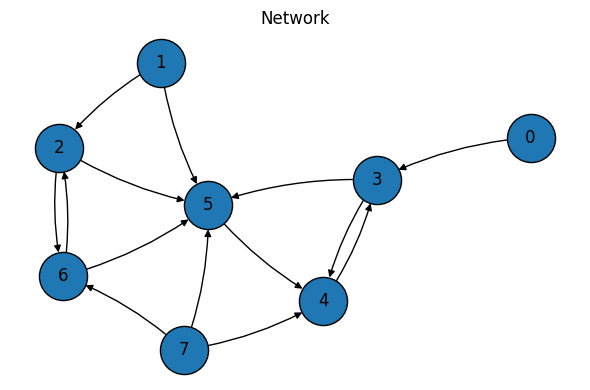

In [ ]:
net =  nx.read_edgelist(file_path_page_rank, create_using=nx.DiGraph())
# Visualization of the network
node_positions = nx.kamada_kawai_layout(net.to_undirected())
cmap = 'OrRd'
node_size = 1200
fig = visualize_network(net, node_positions, cmap=cmap, node_size=node_size, title="Network")

## **b) Compute the pagerank**
Write a function that computes the PageRank on a network by simulating a random walker. In more detail:
1. Initialize the PageRank of all nodes to 0.
2. Pick the current node (the starting point of the random walker) at random.
3. Increase the PageRank of the current node with 1.
4. Select the node, to which the random walker will move next:
    - Draw a random number $p \in [0, 1]$.
    - If $p < d$, the next node is one of the successors of the current one. Pick it randomly.
    - Else, the random walker will teleport. Pick the next node randomly from all the network nodes.
5. Repeat steps 3-4 $N_{steps}$ times.
6. Normalize the PageRank values by $N_{steps}$.

Use your function to compute PageRank in the example network.
Visualize the result on the network by using the PageRank values as node color values.  Compare your results with `nx.pagerank` by plotting both results as a function of node index.

**Note that the above algorithm is only a naive way of computing PageRank. The actual algorithm behind the success of Google, introduced by its founders, Larry Page and Sergey Brin, is based on power iteration (Brin, S and Page, L, 1998, The anatomy of a large-scale hypertextual web search engine).**


In [ ]:
def calc_pagerank(network, d, n_steps, rng):
    """
    Returns the PageRank value, calculated using a random walker, of each
    node in the network. The random walker teleports to a random node with
    probability 1-d and with probability d picks one of the neighbors of the
    current node.

    Parameters
    -----------
    network : a networkx graph object
    d : damping factor of the simulation
    n_steps : number of steps of the random walker
    rng : numpy random number generator

    Returns
    --------
    page_rank: dictionary of node PageRank values (fraction of time spent in
               each node)
    """

    # Initializing PageRank dictionary:
    pagerank = {}
    nodes = list(network.nodes())

    # Initialize PageRank of each node to 0
    for node in nodes:
        pagerank[node] = 0

    # Pick a random starting point for the random walker
    current_node = rng.choice(nodes)

    # Random walker steps
    for _ in range(n_steps):
        # Increase the PageRank of the current node by 1
        pagerank[current_node] += 1

        # Check if the random walker will teleport or go to a neighbor
        if rng.random() < d and len(list(network.neighbors(current_node))) > 0:
            # Pick a random neighbor
            next_node = rng.choice(list(network.neighbors(current_node)))
        else:
            # Teleport to a random node
            next_node = rng.choice(nodes)

        # Update the current node variable
        current_node = next_node

    # Normalize PageRank by n_steps
    for node in nodes:
        pagerank[node] /= n_steps

    return pagerank


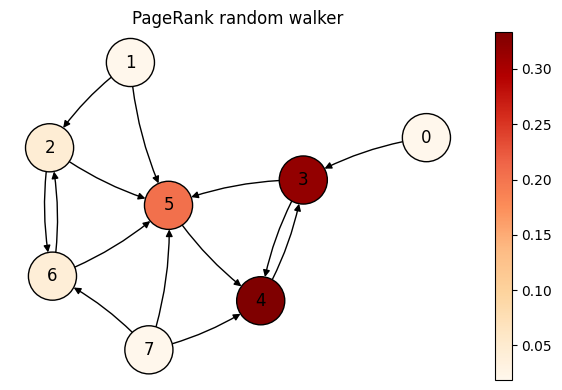

In [ ]:
# Define the number of steps and damping factor
n_steps = 10000
d = 0.85

# Get the list of nodes from the network
nodes = list(net.nodes())

# Calculate PageRank using random walker
pagerank_rw = calc_pagerank(net, d, n_steps, rng)

# Visualization of PageRank on the network
node_colors = [pagerank_rw[node] for node in nodes]

fig = visualize_network(net, node_positions, cmap=cmap, node_size=node_size,
                        node_colors=node_colors, title="PageRank random walker")


Compare the results with `nx.pagerank`.

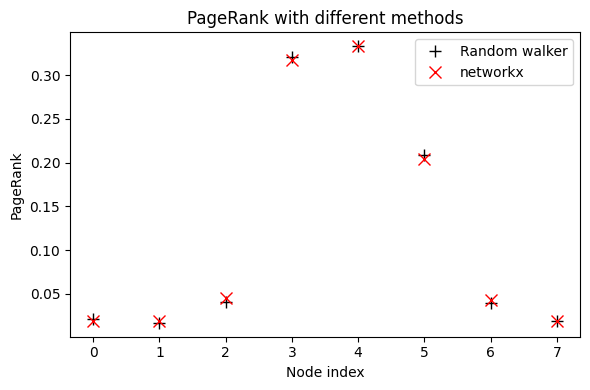

In [ ]:
# PageRank calculated by the NetworkX function `nx.pagerank`:
pagerank_nx = nx.pagerank(net)

nodes = net.nodes()
n_nodes = len(nodes)

# Visualization to check that results from own function and nx.pagerank match:
pagerank_rw_array = np.zeros(n_nodes)
pagerank_nx_array = np.zeros(n_nodes)
for node in nodes:
    pagerank_rw_array[int(node)] = pagerank_rw[node]
    pagerank_nx_array[int(node)] = pagerank_nx[node]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(0, n_nodes), pagerank_rw_array, 'k+', label='Random walker', markersize=8)
ax.plot(range(0, n_nodes), pagerank_nx_array, 'rx', label='networkx', markersize=8)
ax.set_xlabel('Node index')
ax.set_ylabel('PageRank')
ax.set_title('PageRank with different methods')
ax.legend(loc=0)
plt.tight_layout()

## **c) Pagerank based on power iteration**

The above algorithm is a naive way of computing PageRank. The actual algorithm behind the success of Google, introduced by its founders, Larry Page and Sergey Brin, is based on power iteration (Brin, S and Page, L, 1998).

Power iteration finds the leading eigenvector for the "Google matrix" (or other matrices) very fast under certain conditions. An intuitive way of thinking about the power iteration algorithm is to think that at time $t-1$ you have a vector $x(t-1)$ where each element gives the probability of finding the walker. You use the rules of the random walk/teleportation process to find out what are the probabilities of finding the random walkers at each node at time $t$. That is you increase the time $t$ and calculate $x(t)$ based on $x(t-1)$ until the vector $x$ doesn't change any more.

Your task is to write a function that computes the PageRank by using power iteration. In more detail:

1. Initialize the PageRank of all nodes to $\frac{1}{n}$, where $n$ is the number of nodes in the network. That is, at the iteration $t=0$ your PageRank vector contains the same value for each node, and it is equally likely to find the walker in each node. (Any other initialization strategy is possible as long as the sum of all elements is one, and the closer the initial vector is to the final vector the faster you will find the final PageRank values.)
2. Increase the iteration number $t$ by one and create a new empty PageRank vector $x(t)$.
3. Fill in each element of the new vector PageRank vector $x(t)$ using the old PageRank vector $x(t-1)$ and the formula: $x_i(t)=(1-d)\frac{1}{n}+d\sum_{j \in \nu_i}\frac{x_j(t-1)}{k_j^{\mathrm{out}}}$, where $\nu_i$ is the set of nodes that have a directed link ending at $i$, and for each such node $j \in \nu_i$, $k_j^{\mathrm{out}}$ is $j$'s out-degree. In summary, for each node $i$ you need to calculate their entry in the new PageRank vector $x(t)$ as a sum of two parts:
    - probability that the walker will teleport into the node $(1-d)\frac{1}{n}$ and
    - probability that the walker will move from a neighbor $j$ to node $i$. Iterate over each in-neighbor $j$ of the node $i$ (i.e., there is a link from $i$ to $j$) and add the neighbors contribution $d\frac{x_j(t-1)}{k_j^{\mathrm{out}}}$ to the entry of the node $i$ in the new PageRank vector $x(t)$.
4. Repeat steps 2 and 3 $N_{\mathrm{iterations}}$ times.

Use your function to compute PageRank in the example network and visualize the result on the network as in b).

**Hints**:
- The damping factor is normally set to $d = 0.85$.
- You can monitor the progress of the power iteration by printing out the change in the PageRank vector $\Delta(t)=\sum_i | x_{i}(t) - x_{i}(t-1)|$ after each iteration step. The change $\Delta(t)$ should be decreasing function of $t$. $N_{\mathrm{iterations}} = 10$ should be more than enough in most cases.
- You can list the incoming edges to node $i$ with the function `net.in_edges(i)`, where `net` is the network object. Alternatively, you can use the function `net.predecessors(i)`, which returns an iterator over predecessors nodes of node $i$.
- The sum of all elements in the PageRank vector should always equal one. There may be small deviations from this due to numerical errors, but much larger or smaller values are an indication that something is wrong with the code.

In [ ]:
def calc_pagerank_poweriter(network, d, iterations, printable=True):
    deltas = []
    pr_sums = []
    """
    Uses the power iteration method to calculate PageRank value for each node
    in the network.

    Parameters
    -----------
    network : a networkx graph object
    d : damping factor of the simulation
    iterations : number of iterations to perform

    Returns
    --------
    pr_old : dict where keys are nodes and values are PageRank values
    """

    # Get the number of nodes in the network
    n = len(network)

    # Initialize PageRank dictionary with equal probabilities for each node
    pr_old = {node: 1/n for node in network.nodes()}

    for t in range(iterations):
        pr_new = {}  # Create a new PageRank dictionary for this iteration

        # Calculate PageRank for each node
        for node in network.nodes():
            # Calculate the sum of PageRank values from neighbors
            neighbor_sum = sum(pr_old[neighbor] / network.out_degree(neighbor) for neighbor in network.predecessors(node))

            # Calculate the new PageRank for this node
            new_rank = (1 - d) / n + d * neighbor_sum
            pr_new[node] = new_rank

        # Calculate the change in PageRank vector
        delta = sum(abs(pr_new[node] - pr_old[node]) for node in network.nodes())
        deltas.append(delta)
        # Update the PageRank dictionary for the next iteration
        pr_old = pr_new

        pr_sum = sum(pr_new[node] for node in network.nodes())
        pr_sums.append(pr_sum)

        if printable == True:
          print(f"Iteration {t + 1}: Delta = {delta}, Sum of PageRank values = {pr_sum}")


    return pr_old, deltas, pr_sums


Iteration 1: Delta = 0.6729166666666666, Sum of PageRank values = 1.0
Iteration 2: Delta = 0.27093750000000005, Sum of PageRank values = 0.9999999999999999
Iteration 3: Delta = 0.2302968750000001, Sum of PageRank values = 1.0
Iteration 4: Delta = 0.09515738932291667, Sum of PageRank values = 0.9999999999999998
Iteration 5: Delta = 0.05315219889322906, Sum of PageRank values = 0.9999999999999998
Iteration 6: Delta = 0.029955886006673114, Sum of PageRank values = 0.9999999999999998
Iteration 7: Delta = 0.023166703645324783, Sum of PageRank values = 0.9999999999999998
Iteration 8: Delta = 0.012418187990061592, Sum of PageRank values = 0.9999999999999998
Iteration 9: Delta = 0.004863051118250833, Sum of PageRank values = 0.9999999999999998
Iteration 10: Delta = 0.003556812969046197, Sum of PageRank values = 0.9999999999999998


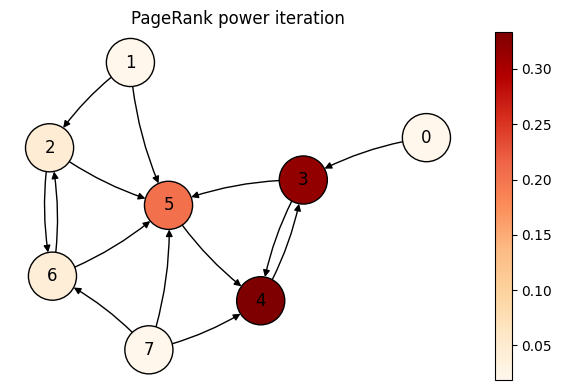

In [ ]:
# PageRank with power iteration
n_iterations = 10
pageRank_pi, deltas, pr_sums = calc_pagerank_poweriter(net, d, n_iterations, True)

# Visualization of PageRank by power iteration

node_colors = [pageRank_pi[node] for node in nodes]
fig = visualize_network(net, node_positions, cmap=cmap, node_size=node_size,
                        node_colors=node_colors, title="PageRank power iteration")

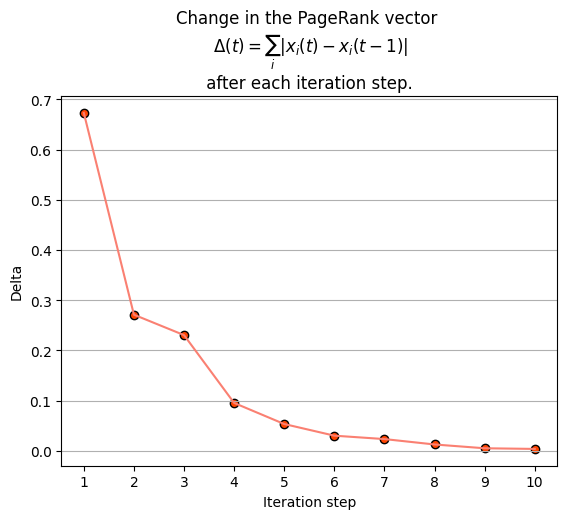

In [ ]:
x_values = range(1, len(deltas) + 1)
plt.plot(x_values, deltas, color="salmon")
plt.scatter(x_values, deltas, color = "orangered", edgecolor="black")
plt.xticks(x_values)
plt.xlabel("Iteration step")
plt.ylabel("Delta")
plt.title("Change in the PageRank vector \n $\Delta(t)=\sum_i | x_{i}(t) - x_{i}(t-1)|$ \n after each iteration step. ")
plt.grid(axis='y')
plt.show()

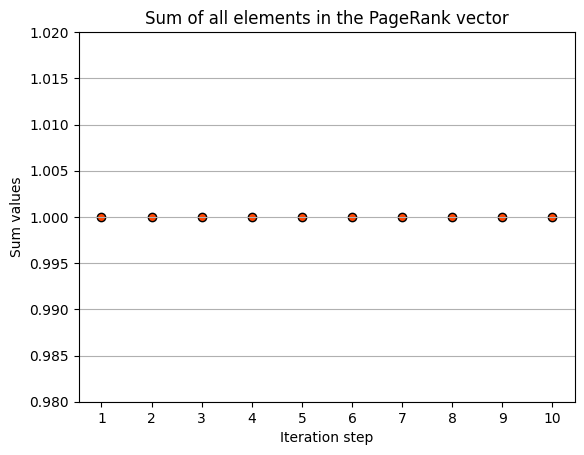

In [ ]:
x_values = range(1, len(pr_sums) + 1)
plt.scatter(x_values, pr_sums, color = "orangered", edgecolor="black")
plt.xticks(x_values)
plt.xlabel("Iteration step")
plt.ylabel("Sum values")
plt.title("Sum of all elements in the PageRank vector")
plt.grid(axis='y')
plt.ylim(0.98, 1.02)
plt.show()

**Domande di teoria da rispondere**

The idea behind PageRank is that each node can vote for importance on other nodes by having a directed edge to these other nodes. Nodes with a (relative) high indegree are considered to be more important than nodes with a low indegree, or no indegree at all. Also, votes coming from important nodes are considered more valuable than votes from not-so-important nodes.

The first part of this formula, that is  $\frac{1−d}{N}$
 , can be thought of as some kind of probability that the given node will be selected at random (i.e. all nodes are at least a bit important). It is constant for all nodes in the graph. The second part of the formula sums over all incoming nodes to the given node. For each of these nodes the PageRank is divided by the number outbound edges. This means that the PageRank of a node is divided over the nodes it has outbound links to.

## **e) Challenge exercise: Time estimations**
The Google search engine indexes billions of websites and the algorithm for calculating the PageRank needs to be extremely fast. In the original paper about PageRank (Brin, S and Page, L, 1998), by Google founders Larry Page and Sergey Brin, they claim that their "iterative algorithm" is able to calculate the PageRank for 26 million webpages in a few hours using a normal desktop computer (in 1998).

Come up with a rough estimate of how long it would take for your power iteration algorithm (part c) and naive random walker algorithm (part b) to do the same. You can assume that the average degree of the 26 million node network is small and that the power iteration converges in the same number of steps as it does for your smaller networks. For the random walk you can assume that you need to run enough steps that the walker visits each node on average $1000$ times. You can also omit any considerations of fitting the large network in memory or the time it takes to read it from the disk etc. With these assumption you can simply calculate the time it takes to run the algorithm in a reasonable size network and multiply the result by the factor that the 26 million node network is bigger than your reasonable sized network.

Report all calculations and parameters you use (such as size of the network, number of steps); simply reporting the result without telling how you obtained it will not get you any points.


**Hints**:
- There are several ways of timing your code. You can use for example IPython's ``%timeit`` command or the Python ``timeit`` module.
- The small example network is probably going to be too small to test out the speed of your function especially if you measure the time it takes to run a Python script. (In this case your function might take milliseconds to run but running the whole script might still take a second or so because of starting Python and loading various modules.) You should aim for a network for which it takes several seconds to run the PageRank function. You might find it useful to use network model in networkx to run your code. For example,
``net=nx.directed_configuration_model(10**4*[5],10**4*[5],create_using=nx.DiGraph())``
will produce network with 10000 nodes where each node has in and out degrees of 5 using the configuration model.
- Don't feel bad if you cannot beat Larry and Sergey in speed when using Networkx and Python. These tools are not meant for speed of computation and even modern computers might not be enough to help. Also, your competitors invented Google.

## **power iteration**

In [ ]:
# Investigating the running time of the power iteration function
num_tests = 10
n_nodes = 10**4
k5net = nx.directed_configuration_model(n_nodes*[5],n_nodes*[5],create_using=nx.DiGraph())
d = 0.85
n_iterations = 10

sum_time = 0
for i in range(num_tests):
    print('Test ' + str(i+1))
    start_time = time.time()
    calc_pagerank_poweriter(k5net,d,n_iterations, False)
    sum_time += time.time()-start_time

avg_time = sum_time/num_tests

print('Power iteration function (10**4 nodes): '+ str(avg_time) +' seconds')
N_nodes = 26*10**6
estimated_time = avg_time/n_nodes*N_nodes/3600
print('Power iteration function (26*10**6 nodes): '+ str(estimated_time) +' hours')

Test 1
Test 2
Test 3
Test 4
Test 5
Test 6
Test 7
Test 8
Test 9
Test 10
Power iteration function (10**4 nodes): 0.8794288873672486 seconds
Power iteration function (26*10**6 nodes): 0.6351430853207906 hours


## **Random walker**

In [ ]:
# Investigating the running time of the random walker function
num_tests = 10
n_nodes = 10**4
k5net = nx.directed_configuration_model(n_nodes*[5],n_nodes*[5],create_using=nx.DiGraph())
d = 0.85
n_steps = 1000000

sum_time = 0
for i in range(num_tests):
    print('Test ' + str(i+1))
    start_time = time.time()
    calc_pagerank(net, d, n_steps, rng)
    sum_time += time.time()-start_time

avg_time = sum_time/num_tests

print('Random walker function (10**4 nodes): '+ str(avg_time) +' seconds')
N_nodes = 26*10**6
estimated_time = avg_time/n_nodes*N_nodes/3600
print('Random walker function (26*10**6 nodes): '+ str(estimated_time) +' hours')

Test 1
Test 2
Test 3
Test 4
Test 5
Test 6
Test 7
Test 8
Test 9
Test 10
Random walker function (10**4 nodes): 140.25537147521973 seconds
Random walker function (26*10**6 nodes): 101.29554606543647 hours


## **f) Challenge exercise: The damping factor**
Investigate the effect of the damping factor $d$ on the PageRank values of the network used in parts a)-c). Repeat the PageRank calculation with *e.g.* 5 different values of $d \in [0,1]$ and plot the PageRank as a function of node index (plots of all values of  $d$ in the same figure). Interpret the results. How and why does the change of $d$ affect the rank of the nodes and the absolute PageRank values? Explain what happens, when d=0 and when d=1.

In case you do not trust your implementations in b) and c), you can use PageRank values obtained with `nx.pagerank` in this last task.

**DEF:** In the PageRank algorithm, the damping factor, often denoted as "d," is a parameter that represents the probability that a random surfer (web user) will continue to follow links on web pages rather than jumping to a random page. It introduces a level of "randomness" or "teleportation" into the surfer's behavior.

Here's how the damping factor works in the PageRank algorithm:

1. **Follow Links (d):** With probability (1 - d), the random surfer follows links on the current page. In this case, the surfer randomly selects one of the outgoing links from the current page and moves to the linked page.

2. **Teleportation (1-d):** With probability (d), the random surfer teleports to a random page on the web, regardless of the links. This represents the possibility that the surfer might become disinterested in the current page and decide to jump to a completely different page in the web graph.

Typical values for the damping factor are often set to around 0.85, but it can vary depending on the specific application and requirements. The choice of the damping factor can influence the convergence and behavior of the PageRank algorithm.

The damping factor helps address issues like disconnected components in the web graph (pages that have no incoming or outgoing links) and prevents the algorithm from getting stuck in spider traps or dead ends.

In summary, the damping factor in the PageRank algorithm balances between following links on the current page and randomly jumping to other pages in the web graph, making the algorithm more robust and realistic.

In [ ]:
def investigate_d(network, ds, colors, iterations):
    """
    Calculates PageRank at different values of the damping factor d and
    visualizes and saves results for interpretation

    Parameters
    ----------
    network : a NetworkX graph object
    ds : a list of d values
    colors : visualization color for PageRank at each d, must have the same length as ds
    iterations : int; number of iterations to perform for PageRank calculation
    """
    n_nodes = len(network.nodes())
    fig, ax = plt.subplots(figsize=(6, 4))

    # Iterate over each value of d and calculate PageRank
    for d, color in zip(ds, colors):
        pr, _ , _ = calc_pagerank_poweriter(network, d, iterations, printable=False)

        # Convert PageRank dictionary to a list of values ordered by node index
        pr_values = [pr[node] for node in sorted(pr.keys())]

        # Plot PageRank values as a function of node index
        ax.plot(range(n_nodes), pr_values, label=f'd = {d}', color=color)
        ax.scatter(range(n_nodes), pr_values, color=color)

    ax.set_xlabel('Node index')
    ax.set_ylabel('PageRank')
    ax.set_title('PageRank with different damping factors')
    ax.legend(loc=0)
    plt.tight_layout()
    plt.grid()

    return fig


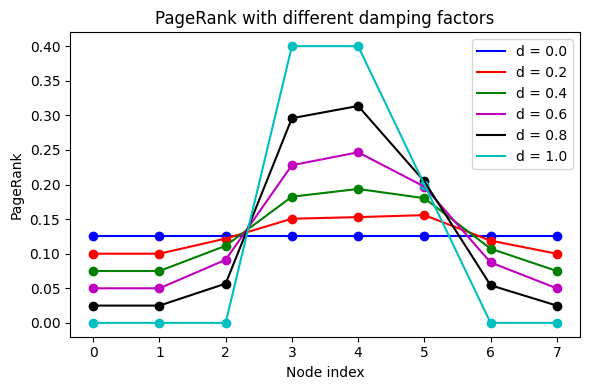

In [ ]:
# Investigating effects of d:

n_steps = 10000
ds = np.arange(0, 1.2, 0.2)
ds = np.around(ds,1)
colors = ['b', 'r', 'g', 'm', 'k', 'c']
net =  nx.read_edgelist(file_path_page_rank, create_using=nx.DiGraph())
fig = investigate_d(net, ds, colors, n_steps)